In [1]:
# %load_ext autoreload
# %autoreload 2

In [2]:
from models.cycle_gan_model import CycleGANModel
import torch
import argparse

/home/heon/anaconda3/envs/stain_norm/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [26]:
model = CycleGANModel()
opt = argparse.Namespace()
opt.input_nc = 3
opt.output_nc = 3
opt.ngf = 64
opt.gpu_ids = [0]
opt.isTrain = False
opt.checkpoints_dir = "./checkpoints/aicha/"
opt.name = "3dhtoleica"
opt.batchSize = 2
opt.fineSize = 256
opt.which_model_netG = "basic"
opt.which_model_netG = "resnet_9blocks"
opt.which_model_netD = "basic"
opt.norm = "instance"
opt.no_dropout = False
opt.init_type = "normal"
opt.which_epoch = "latest"
opt.no_lsgan = False
opt.ndf = 64
opt.continue_train = False
opt.n_layers_D = 3
opt.lr = 0.005
opt.pool_size = 50
opt.aicha_loss = False
opt.beta1 = 0.001
opt.lr_policy = "lambda"
opt.epoch_count = 2
opt.niter = 2
opt.niter_decay = 100
model.initialize(opt)

initialization method [normal]
initialization method [normal]
save_path ./checkpoints/aicha/3dhtoleica/latest_net_G_A.pth


/vast/AI_team/heon/repositories/StainGAN/models/networks.py:19: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  init.normal(m.weight.data, 0.0, 0.02)


save_path ./checkpoints/aicha/3dhtoleica/latest_net_G_B.pth


In [27]:
from data.data_loader import CreateDataLoader
opt.dataset_mode = "unaligned"
opt.dataroot = "data/images"
opt.phaseA = "3dh"
opt.phaseB = "leica"
opt.resize_or_crop = "resize_or_crop"
opt.serial_batches = False
opt.no_flip = False
opt.nThreads = 2
opt.which_direction = "AtoB"
opt.max_dataset_size = 3
dataloder = CreateDataLoader(opt)


CustomDatasetDataLoader
dataset [UnalignedDataset] was created


In [28]:
dataset = dataloder.load_data()
for i, data in enumerate(dataset):
    break

In [29]:
dataset.dataset

In [30]:
model.set_input(data)

In [31]:
model.test()

/vast/AI_team/heon/repositories/StainGAN/models/cycle_gan_model.py:139: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  real_A = Variable(self.input_A, volatile=True)
/vast/AI_team/heon/repositories/StainGAN/models/cycle_gan_model.py:144: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  real_B = Variable(self.input_B, volatile=True)


In [32]:
opt.identity = 0.0

In [33]:
visual = model.get_current_visuals()

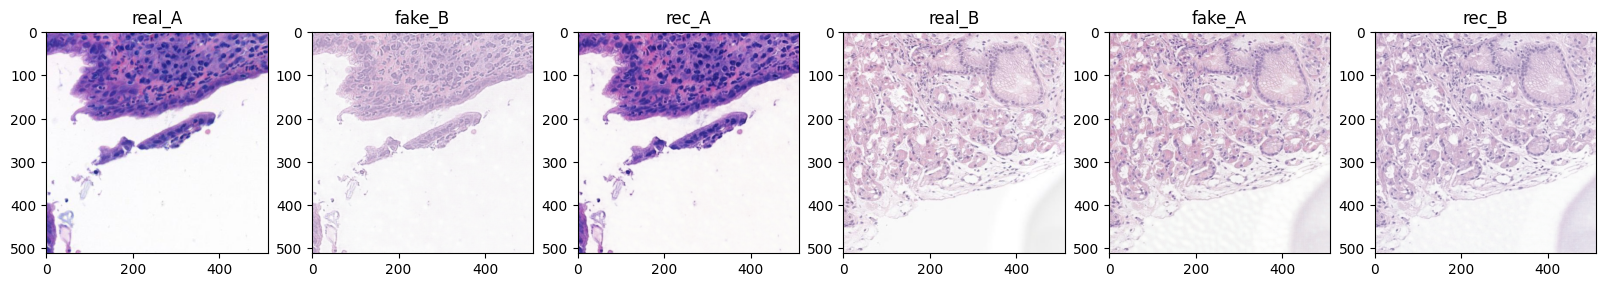

In [34]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(1, 6, figsize=(20, 12))
for i, (name, image) in enumerate(visual.items()):
    axes[i].imshow(image)
    axes[i].set_title(name)